In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import sys
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split

In [2]:
module_path = 'C:\\Users\\timvr\\Documents\\FAKS\\Doktorski_studij\\Python moduli'
sys.path.insert(-1, module_path)

In [3]:
import my_statistics as ms

##### Import data set

In [4]:
adv_df = pd.read_csv('Gradivo/Advertising.csv')

In [5]:
adv_df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
tv = adv_df.TV
radio = adv_df.radio
news = adv_df.newspaper
sales = adv_df.sales

## Linear regression

$y_{est} = \beta_{0, est} + \beta_{1, est}x$

#### Least squares
- izpeljava enačb na tablici

In [7]:
β_1 = sum((tv-ms.mean(tv))*(sales-ms.mean(sales)))/sum((tv-ms.mean(tv))**2)
β_0 = ms.mean(sales) - β_1*ms.mean(tv)
β_0, β_1

(7.032593549127705, 0.04753664043301969)

In [8]:
def least_sqares_lin_reg(x, X, Y):
    β_1 = sum((X-ms.mean(X))*(Y-ms.mean(Y)))/sum((X-ms.mean(X))**2)
    β_0 = ms.mean(Y) - β_1*ms.mean(X)
    y = np.zeros(len(x))
    for i, j in enumerate(x):
        y[i] = linear_regression(j, β_0, β_1)
    return y

In [9]:
def linear_regression(x, β_0, β_1):
    return β_0 + β_1*x

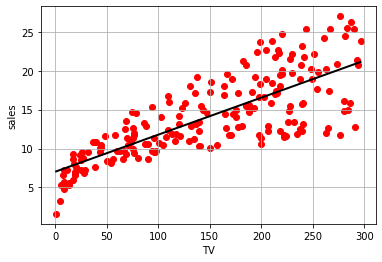

In [10]:
plt.scatter(tv,sales, facecolor='red')
x_lin_reg = (min(tv),max(tv))
y_lin_reg = least_sqares_lin_reg(x_lin_reg, tv, sales)
plt.plot(x_lin_reg,y_lin_reg, lw=2, c='k')
plt.xlabel('TV')
plt.ylabel('sales')
plt.grid()

In [11]:
y_lin_reg, 

(array([ 7.0658692 , 21.12245377]),)

##### Standard error of $\beta_0$, $\beta_1$ - assessing the accuracy of the coeff. estimates

In [12]:
n = 200
tv = tv[:n]
sales = sales[:n]

In [13]:
# residual sum of squares
RSS = sum((sales - least_sqares_lin_reg(tv, tv, sales))**2)
# residual standard error
RSE = np.sqrt(RSS/(n-2))
print(RSE)

3.258656368650463


In [14]:
σ = RSE

In [15]:
# standard  error
SE_β0 = np.sqrt(σ**2*(1/n+ms.mean(tv)/sum((tv-ms.mean(tv))**2)))
SE_β1 = σ**2/sum((tv-ms.mean(tv))**2)
# t-statistic
t = (β_1 - 0)/SE_β1

In [16]:
"""
SE_β1 je zelo nizek -> že majhen β1 omogoča, da zavrnemo hipotezo H_0:β1 = 0.
X in Y sta torej medsebojno odvisna.
Sledi: Potrdimo alternativno hipotezo. H_1:β1 != 0
"""
print(SE_β0, SE_β1, t)

0.23272022102208226 7.239367039024181e-06 6566.408385812044


### Assesssing the accuracy of the model
#### $R^2$ statistic

Mera linearne odvinsosti med X in Y

In [17]:
# total sum of sqares
TSS = sum((sales - ms.mean(sales))**2)
R_sq = (TSS-RSS)/TSS
print(R_sq)

0.6118750508500708


##### Correlation

Tudi mera linearne odvisnosti med X in Y

In [18]:
ms.corr(tv, sales)

0.7783133027372982

## Multiple Linear Regression

In [19]:
tv = adv_df.TV
radio = adv_df.radio
news = adv_df.newspaper
sales = adv_df.sales

In [20]:
# delitev na trening in testne podatke
x_train, x_test, y_train, y_test = train_test_split(adv_df[['TV','radio']],sales, test_size=0.3)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
def multiple_lin_reg(x_test, x_train, y_train):
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    beta_list = LR.coef_
    columns = x_train.columns
    y_test = np.zeros((x_test.shape[0], 1))
    #for i in columns:

In [23]:
LR=LinearRegression()

In [24]:
LR.fit(x_train[['TV','radio']],y_train)

LinearRegression()

In [25]:
tv_grid, radio_grid = np.meshgrid(x_test.TV, x_test.radio)

In [26]:
c1, c2 = LR.coef_
intercept = LR.intercept_

In [27]:
x_train.shape

(140, 2)

In [28]:
def LR_3d(x1, x2,  coef1, coef2, intercept):
    return intercept + x1 * coef1 + x2 * coef2

In [29]:
np.array(x_test['TV'])[0]

239.3

In [30]:
y_est = LR_3d(tv_grid, radio_grid, c1,c2,intercept)

In [31]:
#y_est = LR.predict(x_test)

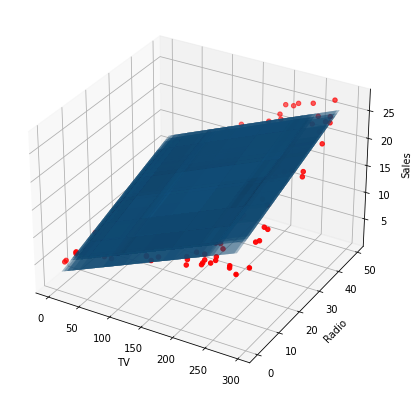

In [32]:
# prikaz za multiple linear regression z 2 vhodnima parametroma
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tv, radio, sales, label='x', facecolor='red')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.plot_surface(tv_grid, radio_grid, y_est, alpha = .1)#, cmap=cm.coolwarm, linewidth=0, antialiased=False)

In [33]:
LR3 = LinearRegression()

In [34]:
x_train, x_test, y_train, y_test = train_test_split(adv_df[['TV','radio','newspaper']],sales, test_size=0.3)

In [35]:
LR3.fit(x_train, y_train)

LinearRegression()

In [36]:
y_test_p = LR3.predict(x_test)

In [37]:
# residual sum of squares (RSS) and total sum of squares (TSS) for predicted data
RSS = sum((y_test - y_test_p)**2)
TSS = sum((y_test - ms.mean(y_test))**2)

In [38]:
# f-statistic
n = len(y_test)
p = 3 # number of predictors
F = (TSS-RSS)/p/(RSS/n-p-1)
print(F) # F mora biti >1, da obstaja povezava med podatki (če povezave ni je vrednost f-statistike blizu 1)

-532.4672307879131


##### Izbira spremenljivk (prediktorjev)

In [39]:
def RSS(y, y_approx):
    return sum((y - y_approx)**2)
def TSS(y):
    return sum((y - ms.mean(y))**2)

In [40]:
def simple_linear_regression(x, X, Y):
    β_1 = sum((X-ms.mean(X))*(Y-ms.mean(Y)))/sum((X-ms.mean(X))**2)
    β_0 = ms.mean(Y) - β_1*ms.mean(X)
    y = np.zeros(len(x))
    for i, j in enumerate(x):
        y[i] = linear_regression(j, β_0, β_1)
    return y

In [41]:
def multiple_linear_regression(x, X, Y):
    LR = LinearRegression()
    LR.fit(X, Y)
    return LR.predict(x)

In [42]:
def R_square(y, y_approx):
    return 1 - (RSS(y, y_approx)/TSS(y))

In [43]:
# forward selection
# step 1: simple linear regressions
predictors = ['newspaper', 'radio', 'TV']
x_train, x_test, y_train, y_test = train_test_split(adv_df[predictors],sales, test_size=0.5)#, random_state=43)
RSS_list = []
for i in predictors:
    y_test_est = simple_linear_regression(x_test[i], x_train[i], y_train)
    RSS_list.append(RSS(y_test, y_test_est))
print('Step 1 results: ', RSS_list)
# step 2: 2 variable model
predictor_1 = predictors.pop(np.argmin(RSS_list))
RSS_list=[]
for i in predictors:
    y_test_est = multiple_linear_regression(x_test[[predictor_1, i]], x_train[[predictor_1, i]], y_train)
    RSS_list.append(RSS(y_test, y_test_est))
print('Step 2 results: ', RSS_list)
# step 2.1: 3 variable model
predictor_2 = predictors.pop(np.argmin(RSS_list))
RSS_list=[]
for i in predictors:
    y_test_est = multiple_linear_regression(x_test[[predictor_1, predictor_2, i]], x_train[[predictor_1, predictor_2, i]], y_train)
    RSS_list.append(RSS(y_test, y_test_est))
print('Step 2.1 results: ', RSS_list)

Step 1 results:  [2192.8498617323316, 1739.2728902378556, 1166.7106091549515]
Step 2 results:  [1062.0681383601773, 315.4791296646264]
Step 2.1 results:  [315.4766604468798]


In [44]:
predictors = ['newspaper', 'radio', 'TV']
x_train, x_test, y_train, y_test = train_test_split(adv_df[predictors],sales, test_size=0.5)#, random_state=43)
chosen =[]
j = 1
while len(predictors)>0:
    RSS_list=[]
    if len(chosen) == 0:
        for i in predictors:
            y_test_est = simple_linear_regression(x_test[i], x_train[i], y_train)
            RSS_list.append(RSS(y_test, y_test_est))
        print(f'Step {j} results: ', RSS_list)
    else:
        for i in predictors:
            y_test_est = multiple_linear_regression(x_test[chosen + [i]], x_train[chosen + [i]], y_train)
            RSS_list.append(RSS(y_test, y_test_est))
            if min(RSS_list) > min_old:
                print(f'Relevant predictors: {chosen}')
                break
        print(f'Step {j} results: ', RSS_list)
    min_old = min(RSS_list)
    chosen.append(predictors.pop(np.argmin(RSS_list)))
    j+=1

Step 1 results:  [2989.4894863571076, 2104.1850669312266, 1115.9205171656267]
Relevant predictors: ['TV']
Step 2 results:  [1176.6381569667847]
Step 3 results:  [353.15792701641266]


In [45]:
list(adv_df.columns)[1:-1]

['TV', 'radio', 'newspaper']

In [46]:
def forward_variable_selection(X, Y, test_size=0.5, random_state=None):
    predictors = list(X.columns)
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=test_size, random_state=random_state)
    chosen =[]
    j = 1
    R_sq_old = 0
    while len(predictors)>0:
        RSS_list=[]
        if len(chosen) == 0:
            for i in predictors:
                y_test_est = simple_linear_regression(x_test[i], x_train[i], y_train)
                RSS_list.append(RSS(y_test, y_test_est))
                R_sq = R_square(y_test, y_test_est)
            print(f'Step {j} results: ', RSS_list, '; R^2= ', R_square(y_test, y_test_est))
        else:
            for i in predictors:
                y_test_est = multiple_linear_regression(x_test[chosen + [i]], x_train[chosen + [i]], y_train)
                RSS_list.append(RSS(y_test, y_test_est))
                R_sq = R_square(y_test, y_test_est)
            print(f'Step {j} results: ', RSS_list, '; R^2= ', R_square(y_test, y_test_est))
        if abs(R_sq_old-R_sq)<0.05:
            pass
            print(f'Relevant predictors: {chosen}')
            return chosen
            
        R_sq_old = R_sq
        chosen.append(predictors.pop(np.argmin(RSS_list)))
        j+=1
    return chosen

In [47]:
forward_variable_selection(adv_df[['newspaper', 'radio', 'TV']],sales, test_size=0.5, random_state=None)

Step 1 results:  [2366.992445473302, 1635.7266888623362, 1182.193733940771] ; R^2=  0.48594843605841187
Step 2 results:  [1056.6729889920823, 278.0184082172066] ; R^2=  0.8791096641392229
Step 3 results:  [280.2181886193228] ; R^2=  0.878153136859835
Relevant predictors: ['TV', 'radio']


['TV', 'radio']

### Linear regression with qualitative variables

In [48]:
credit_df = pd.read_csv('Gradivo/Credit.csv')

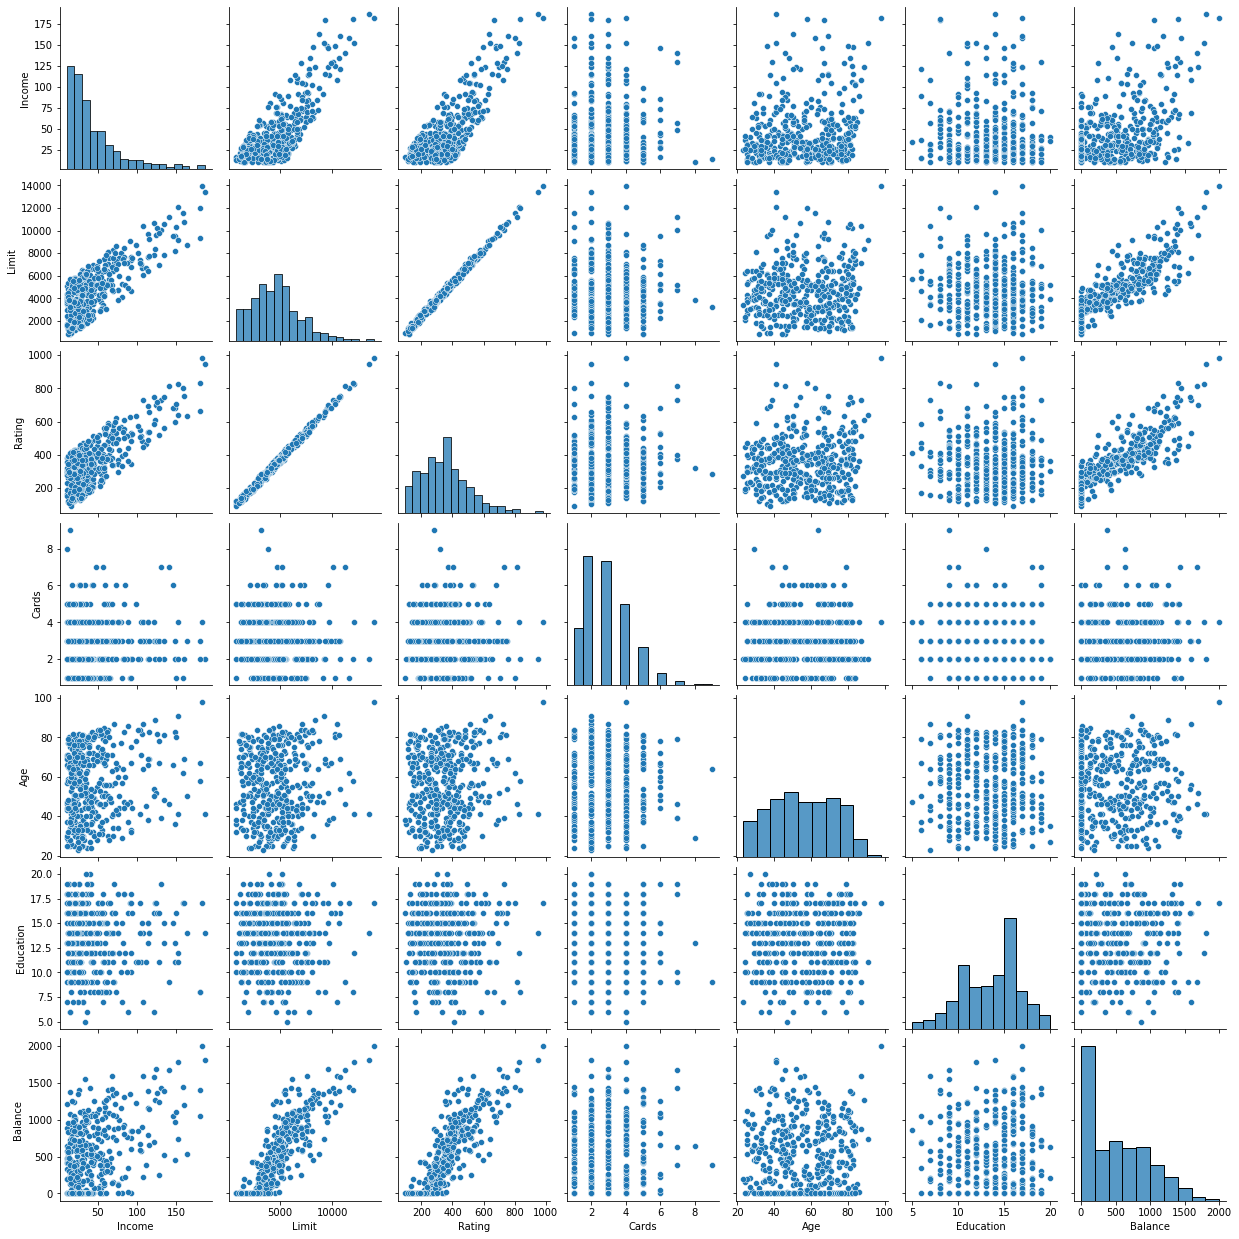

In [49]:
sns.pairplot(credit_df)

In [50]:
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [51]:
def student(x):
    if x.lower()=='yes':
        return 1
    else:
        return 0

In [52]:
credit_df.Student = list(map(student, credit_df.Student))

In [53]:
# fitanje modela - Multiple Linear Regression
LR_cr = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(credit_df[['Student', 'Income']],credit_df['Balance'],
                                                    test_size=.5, random_state=40)
LR_cr.fit(x_train, y_train)

LinearRegression()

In [54]:
# predikcija
y_test_set = LR_cr.predict(x_test)

Text(0, 0.5, 'balance')

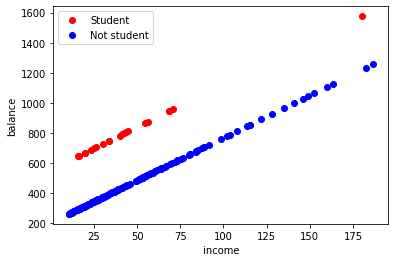

In [55]:
#fig, ax = plt.subplots(1,2)
indices = np.where(x_test['Student']==1)
indices2 = np.where(x_test['Student']==0)
plt.plot(np.array(x_test['Income'])[indices], np.array(y_test_set)[indices], 'ro', label='Student')
plt.plot(np.array(x_test['Income'])[indices2], np.array(y_test_set)[indices2], 'bo', label='Not student')
plt.legend()
plt.xlabel('income')
plt.ylabel('balance')

Možnost relaksacije oblike enačbe:

Upoštevanje medsebojnih efektov posameznih predictorjev -> uvedba dodatnega faktorja $\beta_3$, ki povezuje prediktorja. 
Enačba dobi obliko:

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X1 X2 + \epsilon$   

oz.

$Y = \beta_0 + (\beta_1 + \beta_3 X2) X_1 + \beta_2 X_2 + \epsilon$ ; $\beta' = \beta_1 + \beta_3 X2$

### Interaction between predictors in Linear Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X = poly.fit_transform(credit_df[['Student', 'Income']])

In [58]:
LR_int = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X,credit_df['Balance'],
                                                    test_size=.5, random_state=40)
LR_int.fit(x_train, y_train)

LinearRegression()

In [59]:
y_test_est = LR_int.predict(x_test)

Text(0, 0.5, 'balance')

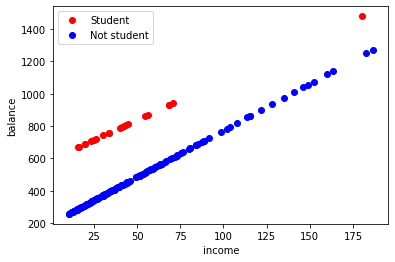

In [60]:
#fig, ax = plt.subplots(1,2)
indices = np.where(x_test[:,0]==1)
indices2 = np.where(x_test[:,0]==0)
plt.plot(np.array(x_test[:,1])[indices], np.array(y_test_est)[indices], 'ro', label='Student')
plt.plot(np.array(x_test[:,1])[indices2], np.array(y_test_est)[indices2], 'bo', label='Not student')
plt.legend()
plt.xlabel('income')
plt.ylabel('balance')

### Polynomial Regression

Relation between predictor and result written as a polynomial:

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \dots + \beta_n X_1^{n}$

Problem is solved as multiple linear regressin

In [61]:
dat = open('Gradivo'+ os.sep + 'Auto.data', mode='r+')

In [62]:
import re

In [63]:
auto_data = []
for l in dat:
    l_ = re.split('  |\t|\n', l)
    while '' in l_:
        l_.remove('')
    for i,j in enumerate(l_):
        while j[0]==' ':
            j = j[1:]
            l_[i] = j
    auto_data.append(l_)

In [64]:
auto_df = pd.DataFrame(auto_data[1:], columns=auto_data[0])

In [65]:
def polynomial_regression(X, Y, n):
    X_list = [np.array(X)]
    for i in range(2, n+1):
        X_list.append(X_list[0]**i)
    #print(np.array(X_list).shape)
    X_df = pd.DataFrame(X_list).transpose()#.rename(columns={0: 'newName1', 1: 'newName2'}, inplace=True)
    x_train, x_test, y_train, y_test = train_test_split(X_df, Y, test_size=.5, random_state=40)
    
    LR_poly = LinearRegression()
    LR_poly.fit(x_train, y_train)
    
    return LR_poly.predict(x_test), x_test, y_test

In [66]:
for j,i in enumerate(auto_df['horsepower']):
    try:
        float(i)
    except ValueError:
        auto_df.drop(j, inplace = True)
for j,i in enumerate(auto_df['mpg']):
    try:
        float(i)
    except ValueError:
        auto_df.drop(j, inplace=True)

In [67]:
x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(auto_df['horsepower'].astype(float), auto_df['mpg'].astype(float), test_size=.5, random_state=40)

In [68]:
y_test_est, x_test, y_test = polynomial_regression(auto_df['horsepower'].astype(float), auto_df['mpg'].astype(float), n=2)
y_test_est5, x_test5, y_test5 = polynomial_regression(auto_df['horsepower'].astype(float), auto_df['mpg'].astype(float), n=5)
y_test_est_lin = simple_linear_regression(x_test_lin, x_train_lin, y_train_lin)

In [69]:
x_test[0]

18      88.0
363     88.0
151    105.0
273    125.0
177     98.0
       ...  
41     180.0
340     64.0
111     85.0
70      97.0
122    122.0
Name: 0, Length: 196, dtype: float64

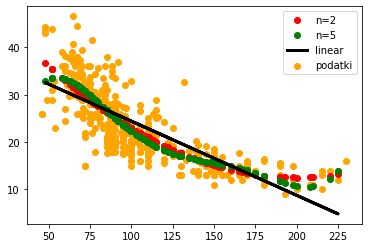

In [70]:
plt.scatter(auto_df['horsepower'].astype(float), auto_df['mpg'].astype(float), facecolor='orange', label='podatki')
plt.plot(x_test[0], y_test_est, 'ro', label='n=2')
plt.plot(x_test5[0], y_test_est5, 'go', label='n=5')
plt.plot(x_test_lin, y_test_est_lin, label='linear', lw=3, c='k')
plt.legend()

### Residual plot - preverjanje nelinearnosti, korelacije med napakami, konstantnosti variance napake, outlierjev

- Pri linearni funkciji so napake (residuals) izrazito nelinearne (U-oblika grafa), zato med podatki očitno obstaja neka nelinearna relacija

- Če lahko določimo nek vzorec v residual plot-u pomeni, da so napake med seboj korelirane, kar lahko vodi do napak - neustrezen pripis pomembnosti nekaterim parametrim, neustrezen standard error in posledično confidence in prediction intervala

- sprememba širine napak (residuals) na residual plotu

- outlierje identificiramo kot točke, ki so močno oddaljene od ostalih -> vplivajo na confidence interval, p-vrednosti, znižajo R^2 vrednosti

In [71]:
residuals_quad = y_test - y_test_est
residuals_lin = y_test_lin - y_test_est_lin

Text(0.5, 1.0, 'Residual Plot for Quadratic fit')

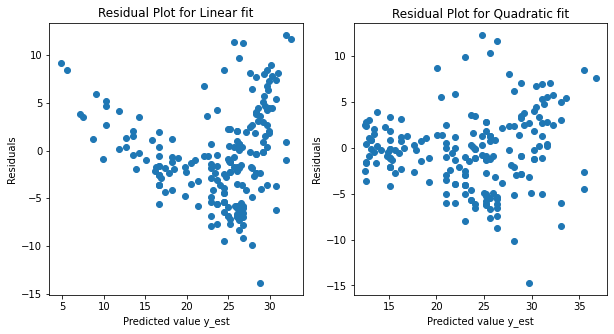

In [72]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(y_test_est_lin, residuals_lin)
ax[0].set_xlabel('Predicted value y_est')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Residual Plot for Linear fit')
ax[1].scatter(y_test_est, residuals_quad)
ax[1].set_xlabel('Predicted value y_est')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residual Plot for Quadratic fit')

### Leverage statistic - for simple linear regression

In [73]:
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,0,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,1,Yes,West,903
2,104.593,7075,514,4,71,11,No,0,No,West,580
3,148.924,9504,681,3,36,11,Yes,0,No,West,964
4,55.882,4897,357,2,68,16,No,0,Yes,South,331


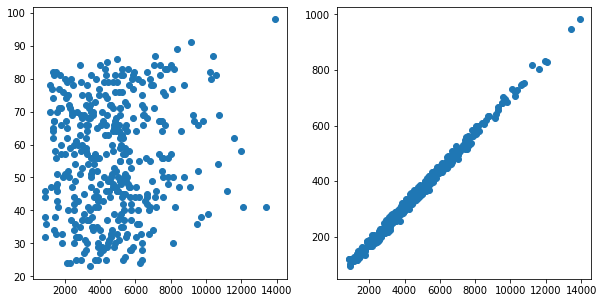

In [74]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(credit_df['Limit'], credit_df.Age)
ax[1].scatter(credit_df['Limit'], credit_df.Rating)

In [75]:
# leverage statistic for limit
h_list = []
for i in credit_df.Limit:
    h_i = 1/len(credit_df.Limit) + (i-ms.mean(credit_df.Limit))**2 / sum((credit_df.Limit-ms.mean(credit_df.Limit))**2)
    h_list.append(h_i)

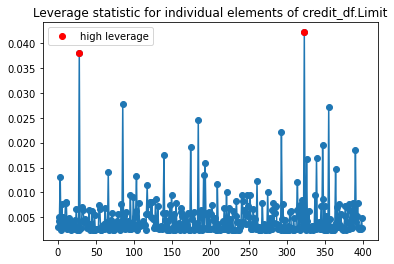

In [76]:
plt.plot(h_list, marker='o')
plt.title('Leverage statistic for individual elements of credit_df.Limit')
plt.plot(np.where(np.array(h_list)>0.035)[0],np.array(h_list)[np.where(np.array(h_list)>0.035)[0]], ls='', marker='o', c='r', label='high leverage')
plt.legend()

### Colinearity 

In [77]:
# detection by correation matrix - not always valid -> problems in case of three of more predictors
np.corrcoef(credit_df.Limit, credit_df.Age) # low Corr -> no collinearity

array([[1.        , 0.10088792],
       [0.10088792, 1.        ]])

In [78]:
np.corrcoef(credit_df.Limit, credit_df.Rating) # high Corr -> collinearity between predictors

array([[1.        , 0.99687974],
       [0.99687974, 1.        ]])

#####  Variance inflation factio (VIF)

VIF = 1 -> smallest value / no collinearity

In [79]:
def VIF(X_j, X_other, test_size=.5, random_state=43):
    x_train, x_test, y_train, y_test = train_test_split(X_other, X_j, 
                                                        test_size=test_size,
                                                        random_state=random_state)
    X_j_est = multiple_linear_regression(x_test, x_train, y_train)
    return (1/(1-R_square(y_test, X_j_est)))

In [80]:
VIF(credit_df.Balance, credit_df[['Age', 'Rating', 'Limit']])

3.6921291266657117

## KNN regression

In [81]:
def KNN_regression_2D(test_points, input_data, output_data, K, show=False):
    """
    Function applies K Nearest Neighbors method.
    Args:
        test_point: test point location (np.array)
        input_data: dictionary of input data (key = feature, value=list of feature values)
        output_data: output for given input_data (np.array)
        K: number of points taken into account by KNN method
        show: Plot graph of points

    Returns: category of test_point

    """
    y_est = np.zeros_like(np.array(output_data))
    test_points = np.array(test_points)
    output_data = np.array(output_data)
    for j,i in enumerate(test_points):
        closest = output_data[abs(test_points-i)<=sorted(abs(test_points-i))[K]]
        sales[abs(tv-i)<sorted(abs(tv-i))[K]]
        
        y_est[j] = sum(closest)/len(closest)
    
    return y_est

In [82]:
y_est_KNN = KNN_regression_2D(tv, tv, sales, K=30)

Text(0.5, 1.0, 'Advertisting.csv data set')

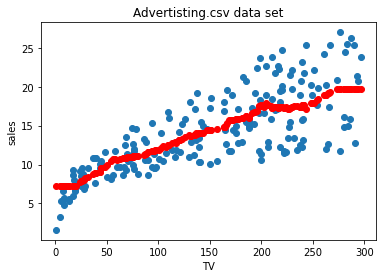

In [91]:
plt.scatter(tv,sales)
plt.plot(tv, y_est_KNN,'ro')
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('Advertisting.csv data set')

In [88]:
y_est_KNN_auto = KNN_regression_2D(auto_df['horsepower'].astype(float), 
                                   auto_df['horsepower'].astype(float), auto_df['mpg'].astype(float), K=50)

Text(0.5, 1.0, 'Auto.data data set')

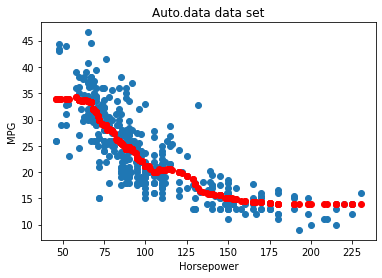

In [90]:
plt.scatter(auto_df['horsepower'].astype(float), auto_df['mpg'].astype(float))
plt.plot(auto_df['horsepower'].astype(float), y_est_KNN_auto,'ro')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Auto.data data set')